# QuantumBlack Hackathon - AI For Good

Binary classifier that predicts presence of methane emissions in an image. Model integrated in a Streamlit Web App for seamless workflows.

***
by: Clara Besnard, Ian Moon, Marina Pellet, Łukasz Pszenny, Adel Remadi, Lasse Schmidt

within: MS Data Sciences & Business Analytics

at: CentraleSupélec & ESSEC Business School
***

This notebook covers building the binary classifier to predict the presence of a methane plume in a given image.

In [ ]:
# if necessary, run installs
%pip install os pandas geopandas shapely reverse_geocoder pycountry

### 1. Import Packages

In [15]:
from importlib import reload
reload(prepData)
reload(loadData)
reload(vizData)

<module 'util.visualize_data' from 'd:\\Dokumente\\2_Bildung\\2_MSc\\1_Classes\\Y2T3_QuantumBlack AI For Good\\QB-AI-for-Good\\util\\visualize_data.py'>

In [1]:
# import own scripts
import util.preprocess_data as prepData
import util.load_data as loadData
import util.visualize_data as vizData

In [2]:
# data handling
import numpy as np
from PIL import Image

# data viz
import matplotlib.pyplot as plt

In [3]:
# set matplotlib and seaborn settings for nicer plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

SMALL_SIZE = 6
MEDIUM_SIZE = 8
BIGGER_SIZE = 10

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)   # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### 2. Load Data

In [4]:
# get transforms
transform     = prepData.get_transform() # to be applied during training
transform_viz = prepData.get_transform(visualize = True) # to visualize what transform does (without normalization)

In [5]:
# fetch metadata
trnval_metadata = loadData.load_metadata("images/metadata.csv", set = "train")
tst_metadata    = loadData.load_metadata("images/metadata.csv", set = "test")

# perform train validation split
trn_metadata, val_metadata = loadData.trainval_split(trnval_metadata, val_size = 0.2)

# show sizes of datasets
print(f"Size of trainval data: {trnval_metadata.__len__()}")
print(f"Size of training data: {trn_metadata.__len__()}")
print(f"Size of validation data: {val_metadata.__len__()}")
print(f"Size of test data: {tst_metadata.__len__()}")

Size of trainval data: 430
Size of training data: 344
Size of validation data: 86
Size of test data: 0


In [6]:
# get pytorch datasets for visualization
trn_dataset_viz_no_transform = loadData.CustomDataset(trn_metadata, apply_CLAHE = False)
trn_dataset_viz_transform    = loadData.CustomDataset(trn_metadata, transform = transform_viz, resize = True, apply_CLAHE = True)

# get pytorch datasets for modeling
trn_dataset = loadData.CustomDataset(trn_metadata, transform = transform, resize = True, apply_CLAHE = True)
val_dataset = loadData.CustomDataset(val_metadata, transform = transform, resize = True, apply_CLAHE = True)
tst_dataset = loadData.CustomDataset(tst_metadata, transform = transform, resize = True, apply_CLAHE = True)

In [7]:
# get mean and std of dataset to identify values by which we need to normalize
trn_dataset.compute_mean_std()

(60.0644191863925, 58.84460681054689)

images/no_plume/20230305_methane_mixing_ratio_id_2384.tif
images/no_plume/20230305_methane_mixing_ratio_id_2384.tif
4096
50176


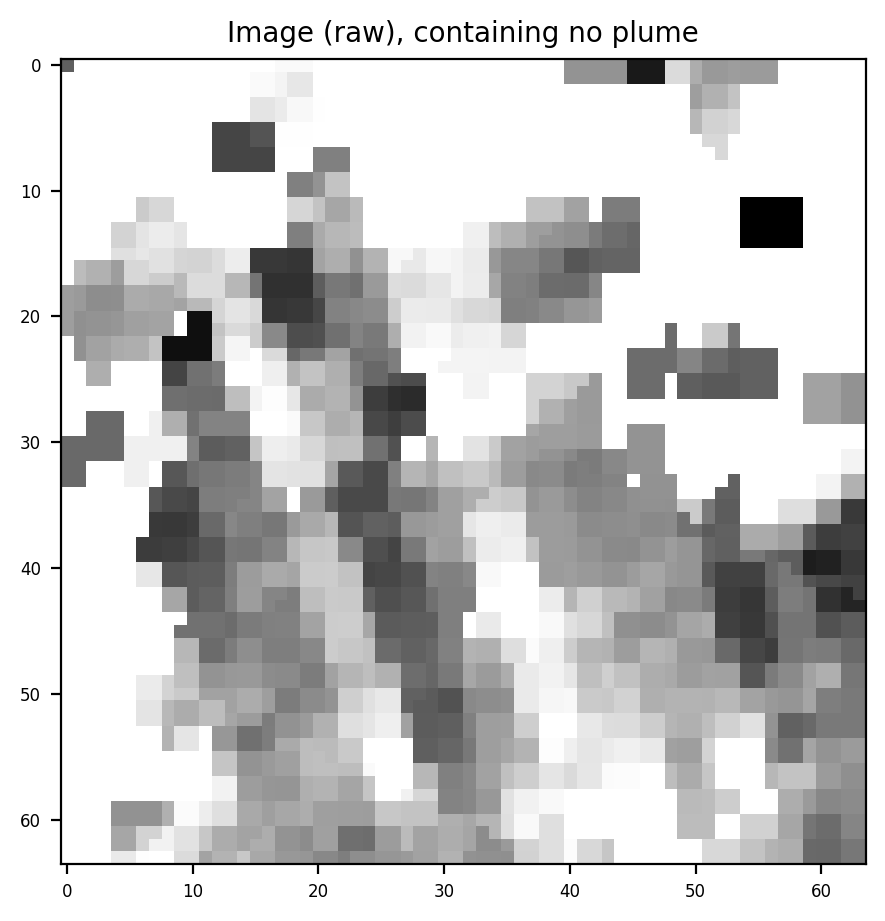

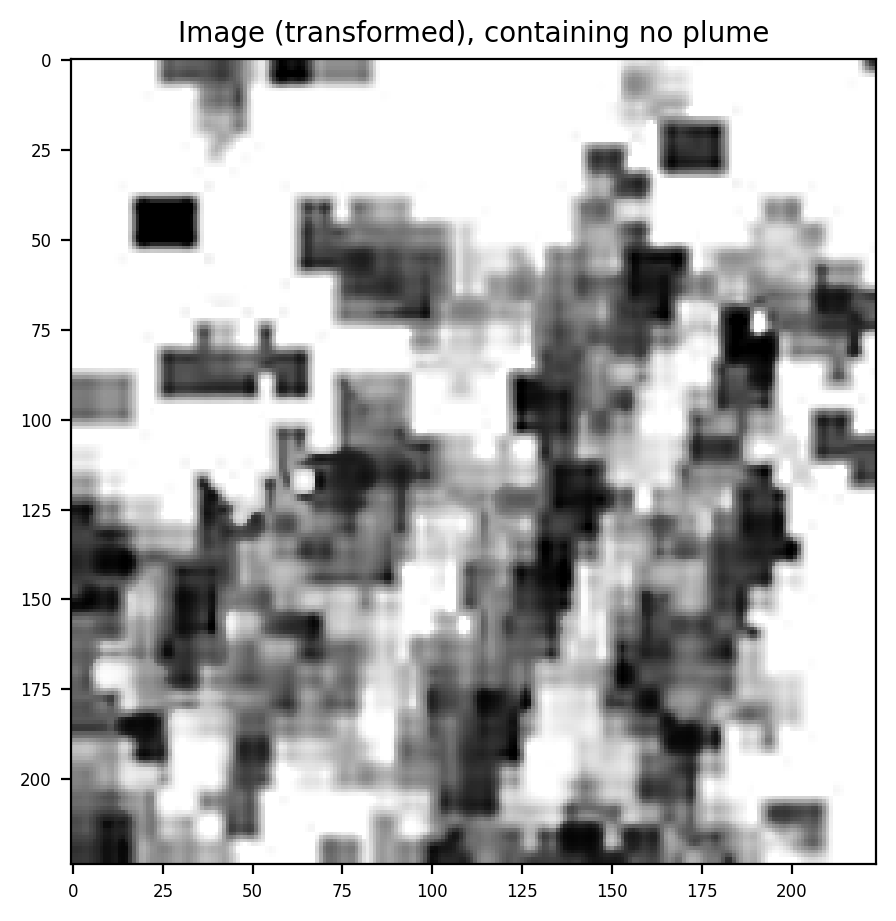

In [8]:
# fetch random image & mask for visualization (training)
idx = 5

# get non-transformed image
_, img, lbl = trn_dataset_viz_no_transform.__getitem__(idx)
path = trn_metadata.loc[idx].path
print(path)

# get transformed image
_, img_tf, _ = trn_dataset_viz_transform.__getitem__(idx)
path = trn_metadata.loc[idx].path
print(path)

# visualize original image (without transformations)
vizData.visualize(img, lbl = lbl)

# visualize transformed image
vizData.visualize(img_tf, lbl = lbl, transform = True)

### 3. Modeling